## Introduction

The topic of day was "urban".

A simple map is created and a bit of a remake of the original map from the website of [Our World in Data](https://ourworldindata.org/grapher/urban-population-share-2050) but done so in Python where I play a bit around with the legend and the labels.

The share of the population living in urban areas is used and were downloaded from this link. The data for the world map where downloaded from this [Github repository](https://github.com/shijithpk/world_map_with_official_JK_border).   

## Installing the Python packages

In [1]:
import geopandas as gpd
import pandas as pd

The shape file for the different countries are obtained from this Github repository:

In [11]:
!wget https://raw.githubusercontent.com/shijithpk/world_map_with_official_JK_border/master/copy_4.shp
!wget https://raw.githubusercontent.com/shijithpk/world_map_with_official_JK_border/master/copy_4.shx
!wget https://raw.githubusercontent.com/shijithpk/world_map_with_official_JK_border/master/copy_4.dbf
!wget https://raw.githubusercontent.com/shijithpk/world_map_with_official_JK_border/master/copy_4.prj
!wget https://raw.githubusercontent.com/shijithpk/world_map_with_official_JK_border/master/copy_4.qpj

--2025-12-08 07:08:12--  https://raw.githubusercontent.com/shijithpk/world_map_with_official_JK_border/master/copy_4.shp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8804264 (8.4M) [application/octet-stream]
Saving to: ‘copy_4.shp.3’

copy_4.shp.3        100%[===================>]   8.40M  --.-KB/s    in 0.03s   

2025-12-08 07:08:12 (324 MB/s) - ‘copy_4.shp.3’ saved [8804264/8804264]

--2025-12-08 07:08:12--  https://raw.githubusercontent.com/shijithpk/world_map_with_official_JK_border/master/copy_4.shx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting re

In [14]:
world = gpd.read_file("/content/copy_4.shp")
## https://ourworldindata.org/grapher/share-of-population-urban
## Upload the data in Google Colab and copy the path
urban = pd.read_csv("/content/share-of-population-urban.csv")
import matplotlib.pyplot as plt

<Axes: >

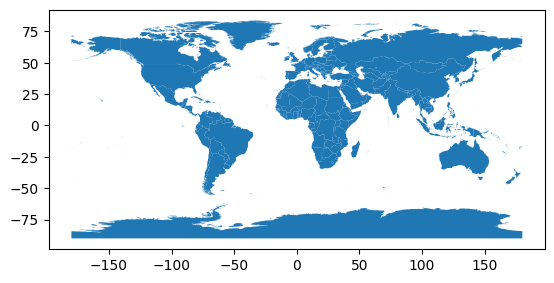

In [15]:
world.plot()

In [22]:
world.shape

(254, 4)

In [20]:
world.head()

,featurecla,NAME_LONG,cartodb _2,geometry
0,Admin-0 country,Aruba,None,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Admin-0 country,Afghanistan,Co-sponsor of Yoga Day resolution and OIC memb...,"POLYGON ((73.19184 36.87703, 73.19184 36.87703..."
2,Admin-0 country,Angola,Co-sponsor of Yoga Day resolution and not an O...,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Admin-0 country,Anguilla,None,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Admin-0 country,Albania,Co-sponsor of Yoga Day resolution and OIC memb...,"POLYGON ((19.74777 42.5789, 19.74601 42.57993,..."


In [30]:
world.columns

Index(['featurecla', 'NAME_LONG', 'cartodb _2', 'geometry'], dtype='object')

In [23]:
# Taka Antarctica out
country_to_drop = world[world['NAME_LONG'] == 'Antarctica'].index
world.drop(country_to_drop, inplace=True)
world.shape

(254, 4)

<Axes: >

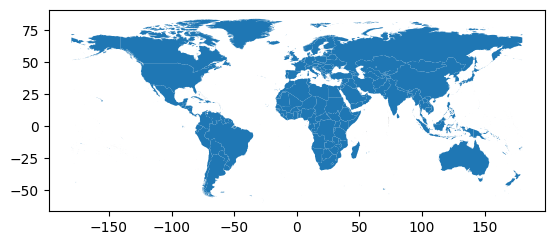

In [27]:
world.plot()

In [28]:
urban.head()

,Entity,Code,Year,Urban population (% of total population),time
0,Afghanistan,AFG,2024,27.265,2024
1,Albania,ALB,2024,65.380,2024
2,Algeria,DZA,2024,75.748,2024
3,Andorra,AND,2024,87.747,2024
4,Angola,AGO,2024,69.281,2024


<Axes: >

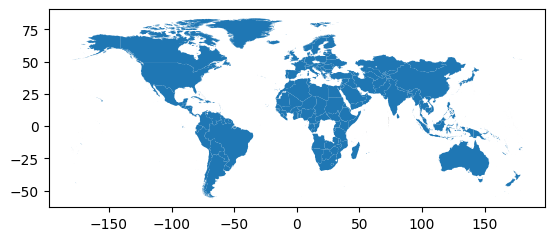

In [31]:
merged = world.merge(urban, left_on="NAME_LONG", right_on="Entity")
merged.plot()

It looks like we have some countries that did not match across the two datasets:

In [40]:
missing = urban[~urban["Entity"].isin(world["NAME_LONG"])]
missing['Entity']


,Entity
24,Brunei
40,Cote d'Ivoire
44,Czechia
45,Democratic Republic of Congo
50,East Timor
57,Eswatini
93,Laos
112,Micronesia (country)
129,North Korea
130,North Macedonia


In [39]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)

missing["NAME_LONG"]


,NAME_LONG
0,Aruba
3,Anguilla
5,Aland Islands
10,American Samoa
12,Ashmore and Cartier Islands
13,French Southern and Antarctic Lands
27,Bajo Nuevo Bank (Petrel Islands)
28,Saint-BarthÃ©lemy
31,Bermuda
35,Brunei Darussalam


Rename and re-merge:

In [44]:
name_matching = {
    "Brunei": "Brunei Darussalam",
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Czechia": "Czech Republic",
    "Russia": "Russian Federation",
    "Democratic Republic of Congo": "Democratic Republic of the Congo",
    "East Timor": "Timor Leste",
    "Eswatini": "Swaziland",
    "Laos": "Lao People's Democratic Republic",
    "Micronesia (country)": "Micronesia",
    "North Korea": "Democratic People's Republic of Korea",
    "North Macedonia": "Macedonia",
    "South Korea": "Republic of Korea",

}

In [45]:
urban

,Entity,Code,Year,Urban population (% of total population),time
0,Afghanistan,AFG,2024,27.265,2024
1,Albania,ALB,2024,65.380,2024
2,Algeria,DZA,2024,75.748,2024
3,Andorra,AND,2024,87.747,2024
4,Angola,AGO,2024,69.281,2024
5,Antigua and Barbuda,ATG,2024,24.338,2024
6,Argentina,ARG,2024,92.579,2024
7,Armenia,ARM,2024,63.929,2024
8,Australia,AUS,2024,86.750,2024
9,Austria,AUT,2024,59.819,2024


In [47]:
urban['Entity'] = urban['Entity'].replace(name_matching)

<Axes: >

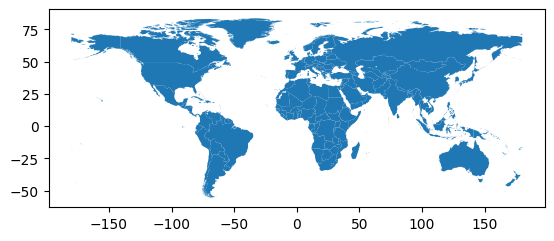

In [48]:
merged_2 = world.merge(urban, left_on="NAME_LONG", right_on="Entity")
merged_2.plot()

A default plot:

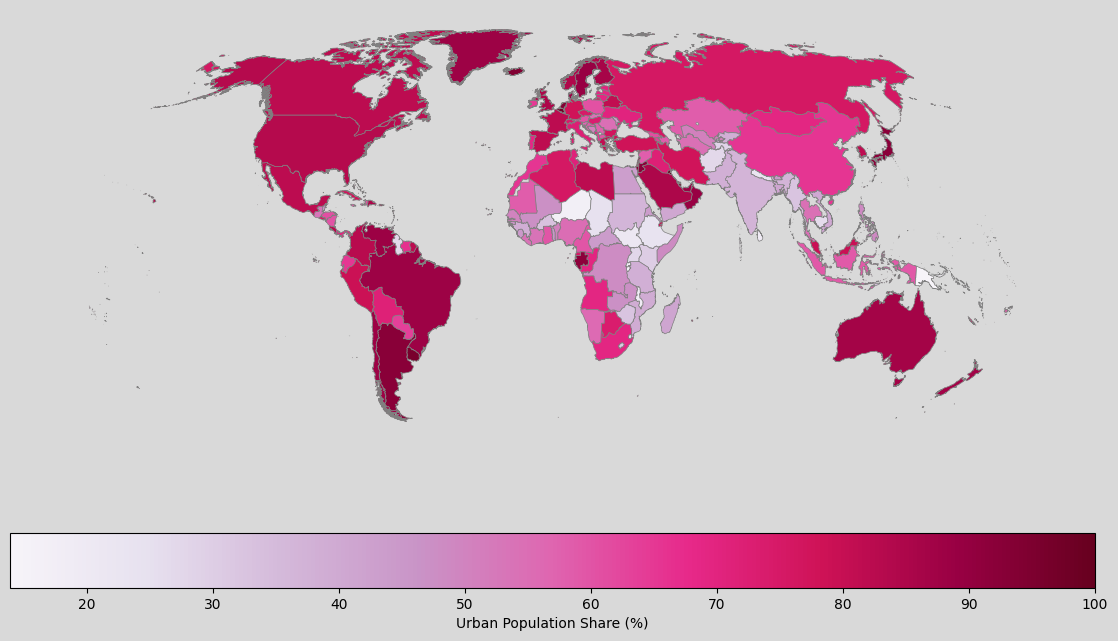

In [129]:
fig, ax = plt.subplots(figsize=(14, 8), facecolor="#d9d9d9")
ax.set_facecolor("#d9d9d9")

# Plot
plot = merged_2.plot(
    column='Urban population (% of total population)',
    cmap='PuRd',
    linewidth=0.5,
    edgecolor='gray',
    legend=True,
    legend_kwds={
        'label': "Urban Population Share (%)",
        'orientation': 'horizontal',    # horizontal legend

    },
    ax=ax
)


ax.axis('off')
plt.show()

Instead of using this projection, I use the Robinson projection:

In [123]:
merged_2 = merged_2.to_crs("ESRI:54030")

The legend bar is too wide, let us change some settings:

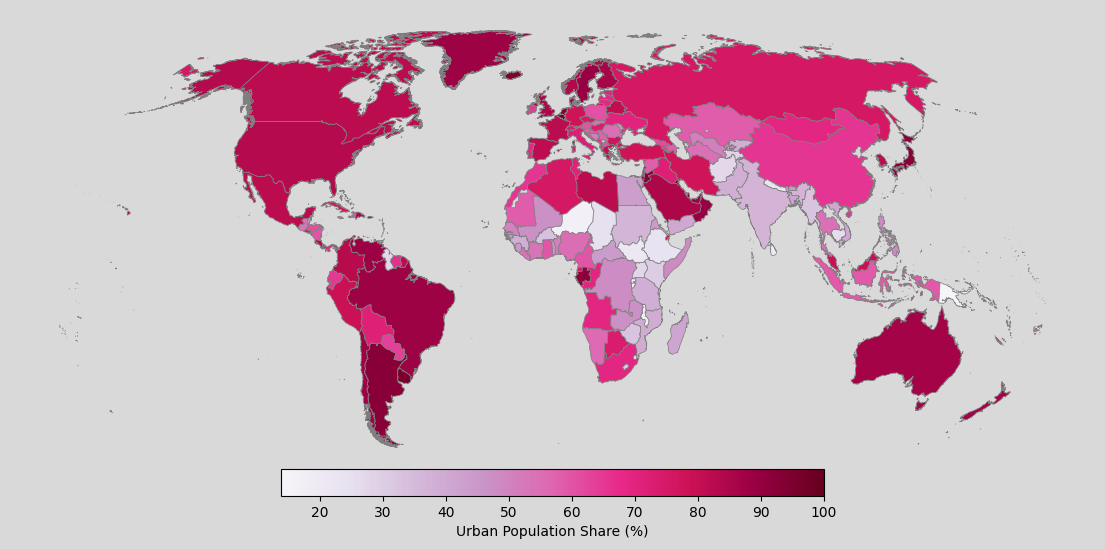

In [126]:
fig, ax = plt.subplots(figsize=(14, 8), facecolor="#d9d9d9")
ax.set_facecolor("#d9d9d9")

# Plot
plot = merged_2.plot(
    column='Urban population (% of total population)',
    cmap='PuRd',
    linewidth=0.5,
    edgecolor='gray',
    legend=True,
    legend_kwds={
        'label': "Urban Population Share (%)",
        'orientation': 'horizontal',    # horizontal legend
        'shrink': 0.5, # fraction by which to multiply the size of the colorbar.
        'aspect': 20, # Ratio of long to short dimension
        'pad':0

    },
    ax=ax
)


ax.axis('off')

plt.show()

Now, I realised I did not want to use the label of the legend as a title for the graph, so I decided to add the text manually. I also added the data source and my name to the plot and export this into a .png:

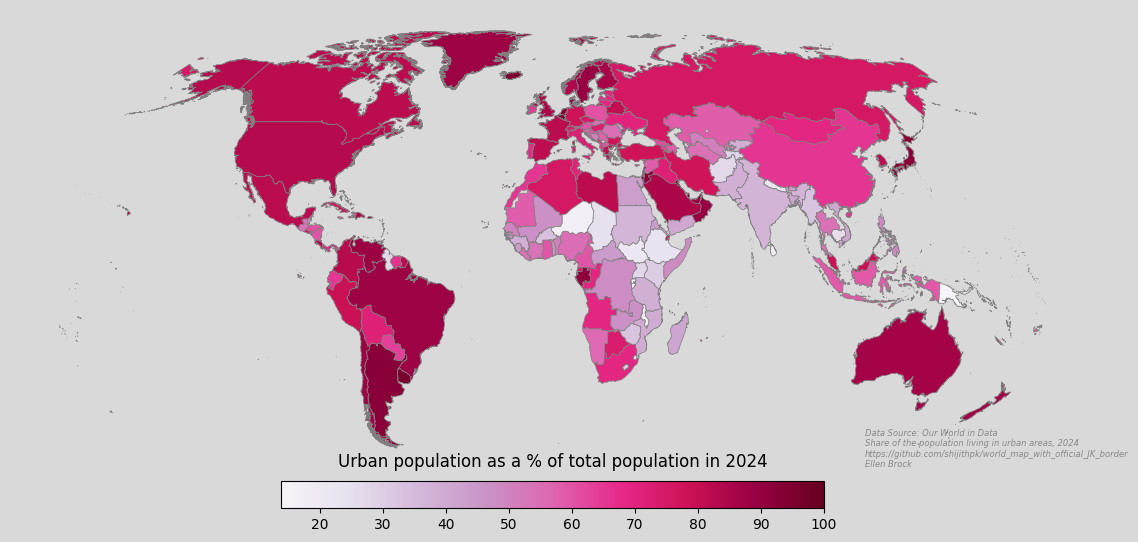

In [134]:
fig, ax = plt.subplots(figsize=(14, 8), facecolor="#d9d9d9")
ax.set_facecolor("#d9d9d9")

# Plot
plot = merged_2.plot(
    column='Urban population (% of total population)',
    cmap='PuRd',
    linewidth=0.5,
    edgecolor='gray',
    legend=True,
    legend_kwds={
        # 'label': "Urban Population Share (%)", # I switch this off since I do not want it
        'orientation': 'horizontal',    # horizontal legend
        'shrink': 0.5, # fraction by which to multiply the size of the colorbar.
        'aspect': 20, # Ratio of long to short dimension
        'pad':0.02 # Space between the plot and the legend
    },
    ax=ax
)

cbar = plot.get_figure().axes[-1]   # the colorbar axis
cbar.set_title("Urban population as a % of total population in 2024", fontsize=12, pad=10)

ax.text(
    0.788, 0.0001,
    "Data Source: Our World in Data\nShare of the population living in urban areas, 2024\nhttps://github.com/shijithpk/world_map_with_official_JK_border\nEllen Brock",
    transform=ax.transAxes,
    fontsize=6,
    color='gray',
    ha='left', va='bottom',
    fontstyle='italic',
    alpha=0.9
)


ax.axis('off')
output_path = "urban_population_map.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

For the actual plot for the competition, I also tinkered a bit further with cutting some space on the left but for brevity, I am omitting this script here. More importantly, I realised when cleaning up this code I should have actually created bins for this code.

For the actual code that I uploaded for the 30DayMapChallenge, I cut some space on the left. However, for brevity I have omitted this here.

However, I realised that however it would have been better if I would have used bins instead of a continuous colour bar so here is the script. However, that is for next time or to be continued!